## 2.1 Select Sentence

### 2.1.1 Basics of Select

    SELECT <column>，
    FROM <table name>;

### 2.1.2 How to use Where?

当不需要取出全部数据时，使用WHERE语句查询只符合某些条件的数据。

    SELECT <column>,...
    FROM <table name>
    WHERE <condition>;

### 2.1.3 SQL Associated Rules

1. 星号（*）代表All Columns的意思。
2. SQL中可以随意使用换行符，不影响语句执行（但不可插入空行）。
3. 设定汉语别名时需要使用双引号（"）括起来。
4. 在SELECT语句中使用DISTINCT可以删除重复行。
5. 注释是SQL语句中用来标识说明或者注意事项的部分。分为1行注释"-- "和多行注释两种"/* */"。
6. SQL语句可以使用AS关键字为列设定别名.

    example:
    SELECT product_id     As id,
           product_name   As name,
           purchase_price AS "进货单价"
      FROM product;

## 2.2 Arithmetic Operational Character & Comparison Character

### 2.2.1 Arithmetic

1. Plus: +
2. Minus: -
3. Multiply: *
4. Divide: /

### 2.2.2 Comparison

1. Equal: =
2. Not Equal: <>
3. Larger than or equal: >=
4. Larger than: >
5. Smaller than or equal: <=
6. Smaller: <

### 2.2.3 Frequent Used Rules

1. SELECT子句中可以使用常数或者表达式。
2. 使用比较运算符时一定要注意不等号和等号的位置。
3. 字符串类型的数据原则上按照字典顺序进行排序，不能与数字的大小顺序混淆。
4. 希望选取NULL记录时，需要在条件表达式中使用IS NULL运算符。希望选取不是NULL的记录时，需要在条件表达式中使用IS NOT NULL运算符。

## 2.3 Logical Operational Character

### 2.3.1 NOT

    example:
    -- 选取出销售单价大于等于1000日元的记录
      SELECT product_name，product_type，sale_price
        FROM product
       WHERE sale_price >= 1000；
    -- 向代码清单2-30的查询条件中添加NOT运算符
      SELECT product_name，product_type，sale_price
        FROM product
       WHERE NOT sale_price >= 1000；

### 2.3.2 AND & OR

1. AND: Union
2. OR: Intercept

example: 商品种类为办公用品”并且“登记日期是 2009 年 9 月 11 日或者 2009 年 9 月 20 日” 理想结果为“打孔器”，但当你输入以下信息时，会得到错误结果

    -- 通过使用括号让OR运算符先于AND运算符执行
    SELECT product_name, product_type, regist_date
      FROM product
     WHERE product_type = '办公用品'
       AND ( regist_date = '2009-09-11'
            OR regist_date = '2009-09-20');

### 2.3.3 Truth Table

#### 2.3.3.1 AND & OR

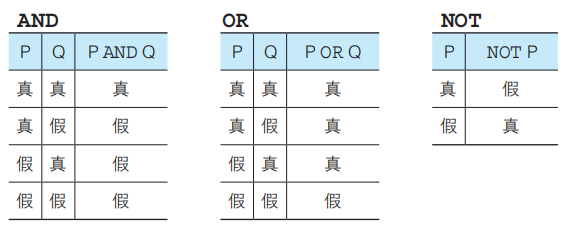

#### 2.3.3.2 NULL

NULL表示除真假之外的第三种值——不确定（UNKNOWN）。一般的逻辑运算并不存在这第三种值。SQL 之外的语言也基本上只使用真和假这两种真值。与通常的逻辑运算被称为二值逻辑相对，只有 SQL 中的逻辑运算被称为三值逻辑

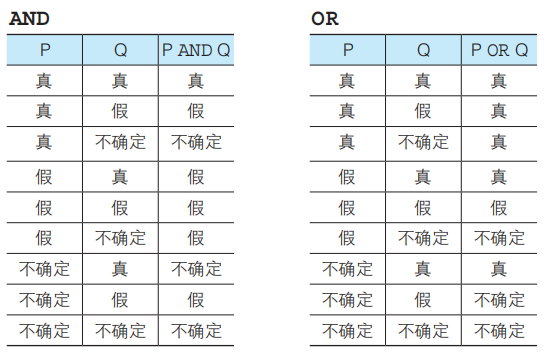

Notes: True 遇到 NULL, NULL $\approx$ False; False 遇到 NULL $\approx$ True

## Exercise:

### 2.1 编写一条SQL语句，从product（商品）表中选取出“登记日期（regist在2009年4月28日之后”的商品，查询结果要包含product name和regist_date两列。

    SELECT product_name, regist_date
      FROM product
    WHERE regist_date>'2009-04-28';

### 2.2 请说出对product 表执行如下3条SELECT语句时的返回结果。

    SELECT *
      FROM product
     WHERE purchase_price = NULL;

无法使用比较运算符来测试 NULL 值，比如 =, <, 或者 <>; 故无输出

    SELECT *
      FROM product
     WHERE purchase_price <> NULL;

无法使用比较运算符来测试 NULL 值，比如 =, <, 或者 <>;故无输出

    SELECT *
      FROM product
     WHERE product_name > NULL;

无法使用比较运算符来测试 NULL 值，比如 =, <, 或者 <>;故无输出

### 2.3 代码清单2-22（2-2节）中的SELECT语句能够从product表中取出“销售单价（saleprice）比进货单价（purchase price）高出500日元以上”的商品。请写出两条可以得到相同结果的SELECT语句。执行结果如下所示。

    SELECT product_name,sale_price,purchase_price
      FROM product
    WHERE (sale_price-purchase_price)>500;

### 2.4 请写出一条SELECT语句，从product表中选取出满足“销售单价打九折之后利润高于100日元的办公用品和厨房用具”条件的记录。查询结果要包括product_name列、product_type列以及销售单价打九折之后的利润（别名设定为profit）。

    SELECT product_name, product_type, sale_price*0.9-purchase_price AS profit
    FROM product
    WHERE (0.9*sale_price-purchase_price>100)
        AND (product_type = '办公用品'
         OR product_type = '厨房用品');

## Query Data with Aggregate Function

### 2.4.1 Aggregate Function

#### 2.4.1.1 Frequently Used Functions:
1. COUNT：计算表中的记录数（行数）
2. SUM：计算表中数值列中数据的合计值
3. AVG：计算表中数值列中数据的平均值
4. MAX：求出表中任意列中数据的最大值
5. MIN：求出表中任意列中数据的最小值

    Example:
    -- 计算全部数据的行数（包含NULL）
    SELECT COUNT(*)
      FROM product;
    -- 计算NULL以外数据的行数
    SELECT COUNT(purchase_price)
      FROM product;
    -- 计算销售单价和进货单价的合计值
    SELECT SUM(sale_price), SUM(purchase_price) 
      FROM product;
    -- 计算销售单价和进货单价的平均值
    SELECT AVG(sale_price), AVG(purchase_price)
      FROM product;
    -- MAX和MIN也可用于非数值型数据
    SELECT MAX(regist_date), MIN(regist_date)
      FROM product;

#### 2.4.1.2 Delete Duplicated Values with Aggregate Functions

    Example:
    SELECT COUNT(DISTINCT product_type)
     FROM product;
    -- 是否使用DISTINCT时的动作差异（SUM函数）
    SELECT SUM(sale_price), SUM(DISTINCT sale_price)
     FROM product;

### 2.4.2 Frequently Used Rules

1. COUNT函数的结果根据参数的不同而不同。COUNT(*)会得到包含NULL的数据行数，而COUNT(<列名>)会得到NULL之外的数据行数。
2. 聚合函数会将NULL排除在外。但COUNT(*)例外，并不会排除NULL。
3. MAX/MIN函数几乎适用于所有数据类型的列。SUM/AVG函数只适用于数值类型的列。
4. 想要计算值的种类时，可以在COUNT函数的参数中使用DISTINCT。
5. 在聚合函数的参数中使用DISTINCT，可以删除重复数据。

## 2.5 Grouping Data in Table

### 2.5.1 Group By

    SELECT <col_1>, <col_2>, <col_3>,...
    FROM <table_name>
    GROUP BY <col_1>, <col_2>, <col_3>, ...;

    Example:
    -- 按照商品种类统计数据行数
    SELECT product_type, COUNT(*)
      FROM product
     GROUP BY product_type;
     -- 不含GROUP BY
    SELECT product_type, COUNT(*)
      FROM product

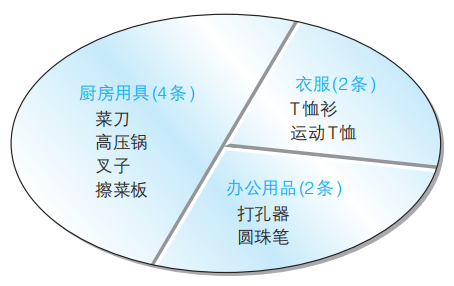

Notes: Group By 对数据按照指定列进行了分组，在Group By子句中指定列被称为聚合键或者分组列

#### 聚合键中包含NULL时

    Example：将进货单价（purchase_price）作为聚合键
    SELECT purchase_price, COUNT(*)
      FROM product
     GROUP BY purchase_price;

此时会将NULL作为一组特殊数据进行处理

#### 在WHERE子句中使用GROUP BY的顺序

   $SELECT -> FROM -> WHERE -> GROUP BY$
    其中前三项用于筛选数据，GROUP BY对筛选出的数据进行处理

### 2.5.2 Common Errors

1. 在聚合函数的SELECT子句中写了聚合健以外的列 使用COUNT等聚合函数时，SELECT子句中如果出现列名，只能是GROUP BY子句中指定的列名（也就是聚合键）。
2. 在GROUP BY子句中使用列的别名 SELECT子句中可以通过AS来指定别名，但在GROUP BY中不能使用别名。因为在DBMS中 ,SELECT子句在GROUP BY子句后执行。
3. 在WHERE中使用聚合函数 原因是聚合函数的使用前提是结果集已经确定，而WHERE还处于确定结果集的过程中，所以相互矛盾会引发错误。 如果想指定条件，可以在SELECT，HAVING（下面马上会讲）以及ORDER BY子句中使用聚合函数。

## 2.6 Specify Condition for filterring Aggregated Results

1. 这里WHERE不可行，因为，WHERE子句只能指定记录（行）的条件，而不能用来指定组的条件（例如，“数据行数为 2 行”或者“平均值为 500”等）。

2. 可以在GROUP BY后使用HAVING子句。

    Example:
    -- 数字
    SELECT product_type, COUNT(*)
      FROM product
     GROUP BY product_type
    HAVING COUNT(*) = 2;
    -- 错误形式（因为product_name不包含在GROUP BY聚合键中）
    SELECT product_type, COUNT(*)
      FROM product
     GROUP BY product_type
    HAVING product_name = '圆珠笔';

## 2.7 Order Queried Results

### 2.7.1 ORDER BY

    SELECT <列名1>, <列名2>, <列名3>, ……
      FROM <表名>
     ORDER BY <排序基准列1>, <排序基准列2>, ……

    默认为升序排列，降序排列为DESC
    -- 降序排列
    SELECT product_id, product_name, sale_price, purchase_price
      FROM product
     ORDER BY sale_price DESC;
    -- 多个排序键
    SELECT product_id, product_name, sale_price, purchase_price
      FROM product
     ORDER BY sale_price, product_id;
    -- 当用于排序的列名中含有NULL时，NULL会在开头或末尾进行汇总。
    SELECT product_id, product_name, sale_price, purchase_price
      FROM product
     ORDER BY purchase_price;

### 2.7.2 Order By Alias

SQL在使用 HAVING 子句时 SELECT 语句的顺序为：FROM → WHERE → GROUP BY → HAVING → SELECT → ORDER BY。

其中SELECT的执行顺序在 GROUP BY 子句之后，ORDER BY 子句之前。也就是说，当在ORDER BY中使用别名时，已经知道了SELECT设置的别名存在，但是在GROUP BY中使用别名时还不知道别名的存在，所以不能在ORDER BY中可以使用别名，但是在GROUP BY中不能使用别名

## Exercise:

### 2.5 请指出下述SELECT语句中所有的语法错误。

    SELECT product id，SUM（product name）
    --本SELECT语句中存在错误。
      FROM product 
     GROUP BY product_type 
     WHERE regist_date > '2009-09-01'；

1. SELECT product_id ~~SUM(product_name)~~ ： product_name 不能用 SUM function
2. GROUP BY 和 WHERE的顺序交换

### 2.6 请编写一条SELECT语句，求出销售单价（sale_price列）合计值是进货单价（purchase prilce列）合计值1.5倍的商品种类。执行结果如下所示。

    SELECT product_type,SUM(sale_price) AS sum,SUM(purchase_price) AS sum
      from product
     GROUP BY product_type
    HAVING SUM(sale_price)=1.5*SUM(purchase_price)
    ORDER BY product_type DESC;

### 2.7 此前我们曾经使用SELECT语句选取出了product（商品）表中的全部记录。当时我们使用了ORDERBY子句来指定排列顺序，但现在已经无法记起当时如何指定的了。请根据下列执行结果，思考ORDERBY子句的内容。

    SELECT *
    FRROM product
    ORDER BY regist_date ASC, sale_price ASC;